In [1]:
# 标准库
import time
from math import sqrt
import os

# 第三方库
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from IPython.display import display

#三大类别数据回归算法
from xgboost import XGBRegressor

# Scikit-learn 库
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import BayesianRidge, ElasticNet, LinearRegression, Ridge, RidgeCV, SGDRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import Binarizer, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

sns.set(font='serif', style='ticks')
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.sans-serif']=['Arial Unicode MS']

plt.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_columns',None)

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam,Adamax,Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D,MaxPooling1D, MaxPooling2D,GlobalAveragePooling1D,Flatten, Dense

In [2]:
import pandas as pd

# 读取文件
data1 = pd.read_csv('./Vm_vce.csv')
data2 = pd.read_csv('./Vm.csv')

X = data1[['m','c','v']]
Y1 = data2[['PSI', 'DELTA']]

In [42]:
transfer1 = StandardScaler()
X = transfer1.fit_transform(X)

transfer2 = StandardScaler()
Y1 = transfer2.fit_transform(Y1)

In [43]:
samples_per_slice = 701
n_samples = Y1.shape[0] // samples_per_slice
feature_slices_Y1 = Y1[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 2))
Y1 = np.stack(feature_slices_Y1, axis=0)
print(Y1.shape)  # (110, 701, 2)

(606, 701, 2)


In [44]:
x_train, x_test, y_train, y_test =train_test_split(X, Y1, test_size=0.2, random_state=37,shuffle=True)

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Reshape, Dropout, RepeatVector
from tensorflow.keras.regularizers import l2


l2_reg = l2(1.6012496073680687e-93)
# 建立序列预测模型
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3,)))
model.add(RepeatVector(701))  # 将输入重复seq_length次来匹配输出的时间步长
model.add(Conv1D(filters=128, kernel_size=4, activation='relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=4, activation='relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=6, activation='relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', kernel_regularizer=l2_reg))
model.add(MaxPooling1D(pool_size=2))

model.add(Dropout(0.05195500021948446))
model.add(Flatten())

# 通过添加另一个Dense层，然后使用Reshape层调整形状为(701, 2)
model.add(Dense(701 * 2))
model.add(Reshape((701, 2)))

# 输出模型结构
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               2048      
                                                                 
 repeat_vector_1 (RepeatVec  (None, 701, 512)          0         
 tor)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 698, 128)          262272    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 349, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 346, 16)           8208      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 173, 16)          

In [21]:
callbacks = [EarlyStopping(monitor='val_loss', patience=79, verbose=1, min_delta=0.00001)]

In [22]:
# 编译模型，使用MSE损失函数和SGD优化器
model.compile(loss='mean_squared_error', optimizer=Adamax(learning_rate=0.00013682016083260972))

# 训练模型，假设训练数据为X_train和y_train
history = model.fit(x_train, y_train, callbacks=callbacks,epochs=1000, batch_size=16, validation_split=0.4162773993435479)

Epoch 1/1000
18/18 [==============================] - 4s 38ms/step - loss: 0.9572 - val_loss: 1.0356
Epoch 2/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.9463 - val_loss: 1.0167
Epoch 3/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.9147 - val_loss: 0.9634
Epoch 4/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.8504 - val_loss: 0.8662
Epoch 5/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.7550 - val_loss: 0.7644
Epoch 6/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.6677 - val_loss: 0.6747
Epoch 7/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.5965 - val_loss: 0.6008
Epoch 8/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.5424 - val_loss: 0.5546
Epoch 9/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.5068 - val_loss: 0.5263
Epoch 10/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4856 - val_loss: 0.505

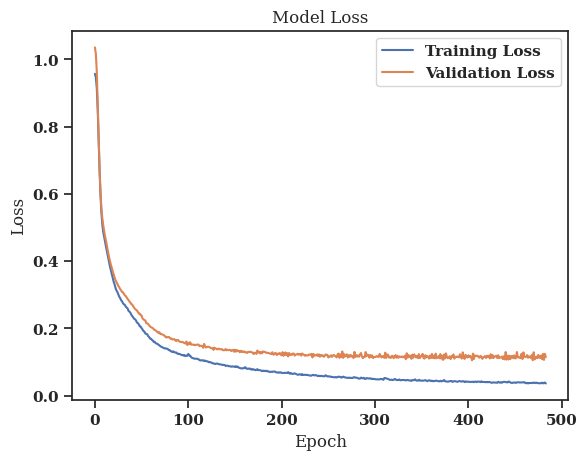

In [23]:
#绘制训练集和验证集的损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [45]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [46]:
y_pred.shape

(122, 701, 2)

In [47]:
y_pred_reshaped = y_pred.reshape(-1, 2)
print(y_pred_reshaped.shape)

y_test_reshaped = y_test.reshape(-1, 2)
print(y_test_reshaped.shape)

(85522, 2)
(85522, 2)


In [48]:
# 通过inverse_transform方法将标准化后的输出还原为原始值
y_pred_reshaped = transfer2.inverse_transform(y_pred_reshaped)

# 同样，如果想要还原测试集中的真实值
y_test_reshaped = transfer2.inverse_transform(y_test_reshaped)

In [49]:
# 提取前701个的第一列和第二列
# n_pred = y_pred_reshaped[:, 0]
# n_test = y_test_reshaped[:, 0]
# k_pred = y_pred_reshaped[:, 1]
# k_test = y_test_reshaped[:, 1]
PSI_pred = y_pred_reshaped[:, 0]
PSI_test = y_test_reshaped[:, 0]
DELTA_pred = y_pred_reshaped[:, 1]
DELTA_test = y_test_reshaped[:, 1]

# 打印形状
# print(n_pred.shape)  # 输出(122, 701)
# print(n_test.shape)  # 输出(122, 701)
# print(k_pred.shape)  # 输出(122, 701)
# print(k_test.shape)  # 输出(122, 701)
print(PSI_pred.shape)  # 输出(122, 701)
print(PSI_test.shape)  # 输出(122, 701)
print(DELTA_pred.shape)  # 输出(122, 701)
print(DELTA_test.shape)  # 输出(122, 701)

(85522,)
(85522,)
(85522,)
(85522,)


In [50]:
mse = mean_squared_error(PSI_test, PSI_pred)
print("PSI_test MSE: ", mse)
rmse = np.sqrt(mse)
print("PSI_test RMSE: ", rmse)
mae = mean_absolute_error(PSI_test, PSI_pred)
print("PSI_test MAE: ", mae)
r2 = r2_score(PSI_test, PSI_pred)
print("PSI_test R2 score: ", r2)

PSI_test MSE:  0.8446353987873706
PSI_test RMSE:  0.919040477230122
PSI_test MAE:  0.62304795458938
PSI_test R2 score:  0.9630765779043234


In [51]:
mse = mean_squared_error(DELTA_test, DELTA_pred)
print("DELTA_test MSE: ", mse)
rmse = np.sqrt(mse)
print("DELTA_test RMSE: ", rmse)
mae = mean_absolute_error(DELTA_test, DELTA_pred)
print("DELTA_test MAE: ", mae)
r2 = r2_score(DELTA_test, DELTA_pred)
print("DELTA_test R2 score: ", r2)

DELTA_test MSE:  270.0815294637245
DELTA_test RMSE:  16.434157400479176
DELTA_test MAE:  4.872359750394785
DELTA_test R2 score:  0.9212218785166127


In [14]:
samples_per_slice = 701
n_samples = PSI_pred.shape[0] // samples_per_slice
feature_slices_pred = PSI_pred[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
PSI_pred = np.stack(feature_slices_pred, axis=0)
print(PSI_pred.shape) 

samples_per_slice = 701
n_samples = PSI_test.shape[0] // samples_per_slice
feature_slices_test = PSI_test[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
PSI_test = np.stack(feature_slices_test, axis=0)
print(PSI_test.shape)

samples_per_slice = 701
n_samples = DELTA_pred.shape[0] // samples_per_slice
feature_slices_pred = DELTA_pred[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
DELTA_pred = np.stack(feature_slices_pred, axis=0)
print(DELTA_pred.shape) 

samples_per_slice = 701
n_samples = DELTA_test.shape[0] // samples_per_slice
feature_slices_test = DELTA_test[:n_samples * samples_per_slice].reshape((n_samples, samples_per_slice, 1))
DELTA_test = np.stack(feature_slices_test, axis=0)
print(DELTA_test.shape)

(122, 701, 1)
(122, 701, 1)
(122, 701, 1)
(122, 701, 1)


In [1]:
# 生成x坐标轴数据
wavelength = range(200, 901)

# 遍历121个数据，分别绘制四条曲线
for i in range(122):
    plt.figure()
    # plt.plot(wavelength, n_pred[i], 'b-', label='n_pred')
    # plt.plot(wavelength, n_test[i], 'b--', label='n_test')
    # plt.plot(wavelength, k_pred[i], 'r-', label='k_pred')
    # plt.plot(wavelength, k_test[i], 'r--', label='k_test')
    plt.plot(wavelength, PSI_pred[i], 'y-', label='PSI_pred')
    plt.plot(wavelength, PSI_test[i], 'y--', label='PSI_test')
    plt.plot(wavelength, DELTA_pred[i], 'g-', label='DELTA_pred')
    plt.plot(wavelength, DELTA_test[i], 'g--', label='DELTA_test')
    
    plt.xlabel('Wavelength[nm]')
    plt.ylabel('Value')
    plt.title('Data {}'.format(i+1))
    plt.legend()
    plt.show()